Loading Data: 100%|██████████| 8/8 [00:00<00:00, 10699.76it/s]


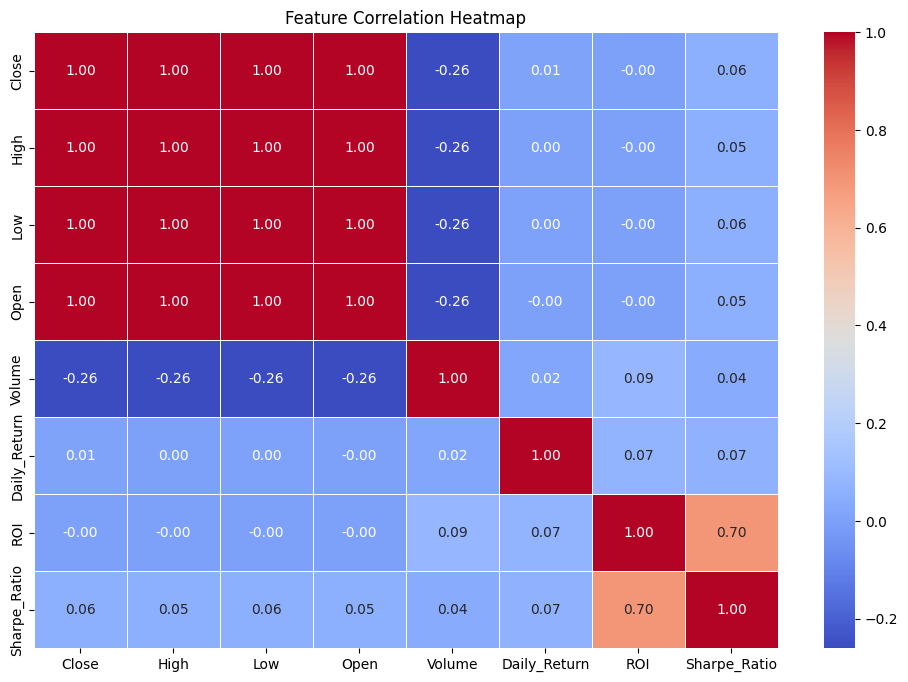

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from tqdm import tqdm

# Load dataset with tqdm progress
tqdm.pandas(desc="Loading Data")
df = pd.read_csv("./final_stock_data.csv", parse_dates=["Date"])

# Fill missing values with tqdm progress
df = df.progress_apply(lambda x: x.ffill().bfill())

# Drop non-numeric columns before training
df.drop(columns=["Date", "Stock"], errors="ignore", inplace=True)

# Select features for modeling
features = ["Close", "High", "Low", "Open", "Volume", "Daily_Return", "ROI", "Sharpe_Ratio"]

# Normalize features with tqdm
scaler = MinMaxScaler()
df[features] = pd.DataFrame(
    scaler.fit_transform(df[features]),
    columns=features
).progress_apply(lambda x: x)

# Compute correlation matrix instead of raw values (faster)
corr_matrix = df[features].corr()

# Plot the heatmap without annotations for speed
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


